# Exploration des Données - Dataset Ventes en Ligne

## Objectif
Analyser le dataset `online_sales_dataset.csv` pour comprendre :
- Structure et dimensions des données
- Types de variables et distributions
- Valeurs manquantes et aberrantes
- Relations entre variables
- Variable cible `ReturnStatus`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [2]:
# Chargement des données
df = pd.read_csv('../data/raw/online_sales_dataset.csv')

print(f"Shape: {df.shape}")
print(f"Colonnes: {list(df.columns)}")

df.head()

Shape: (49782, 17)
Colonnes: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod', 'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'WarehouseLocation', 'OrderPriority']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [3]:
# Types de données et valeurs manquantes
print("Types de données:")
df.info()

print("\nValeurs manquantes:")
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_pct
})
print(missing_summary[missing_summary['Valeurs manquantes'] > 0])

Types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  Orde

In [4]:
# Statistiques
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


ReturnStatus
Not Returned    44888
Returned         4894
Name: count, dtype: int64

Taux de retour global: 9.83%


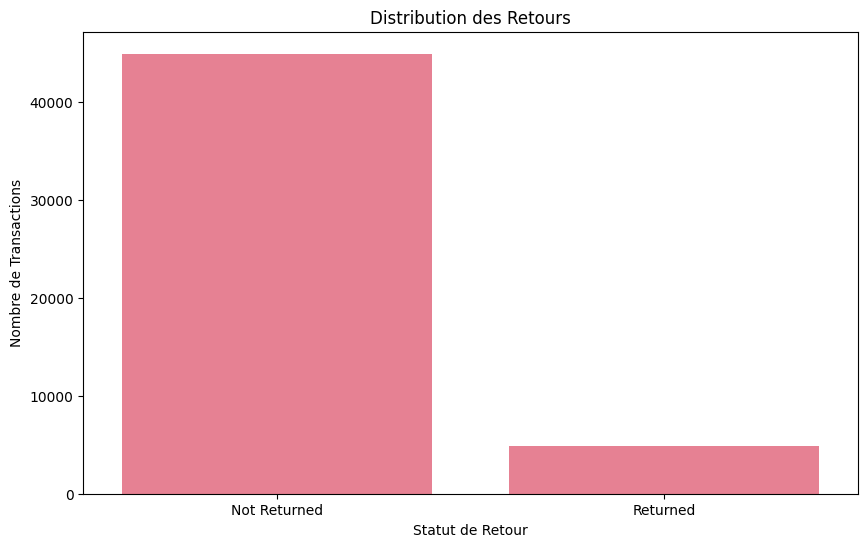

In [5]:
# Analyse de la variable cible
print(df['ReturnStatus'].value_counts())
print(f"\nTaux de retour global: {(df['ReturnStatus'] == 'Returned').mean() * 100:.2f}%")

# Visualisation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ReturnStatus')
plt.title('Distribution des Retours')
plt.xlabel('Statut de Retour')
plt.ylabel('Nombre de Transactions')
plt.show()

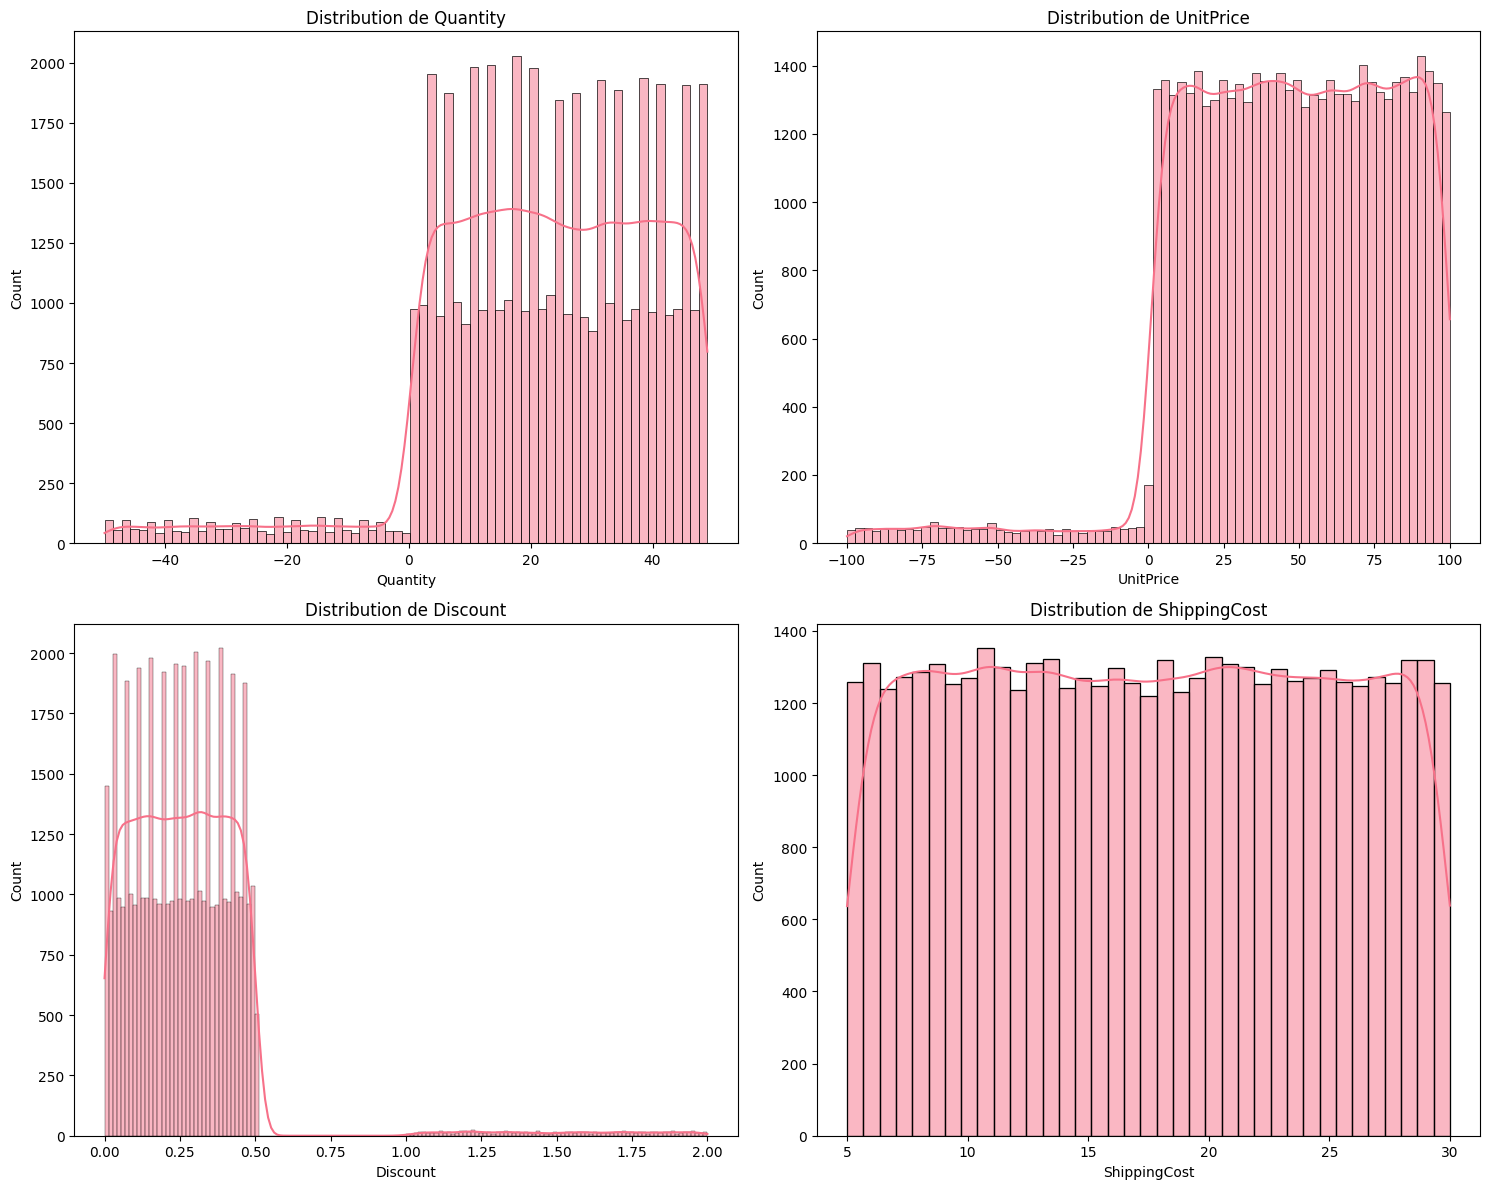

In [6]:
# Variables numériques
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(numeric_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

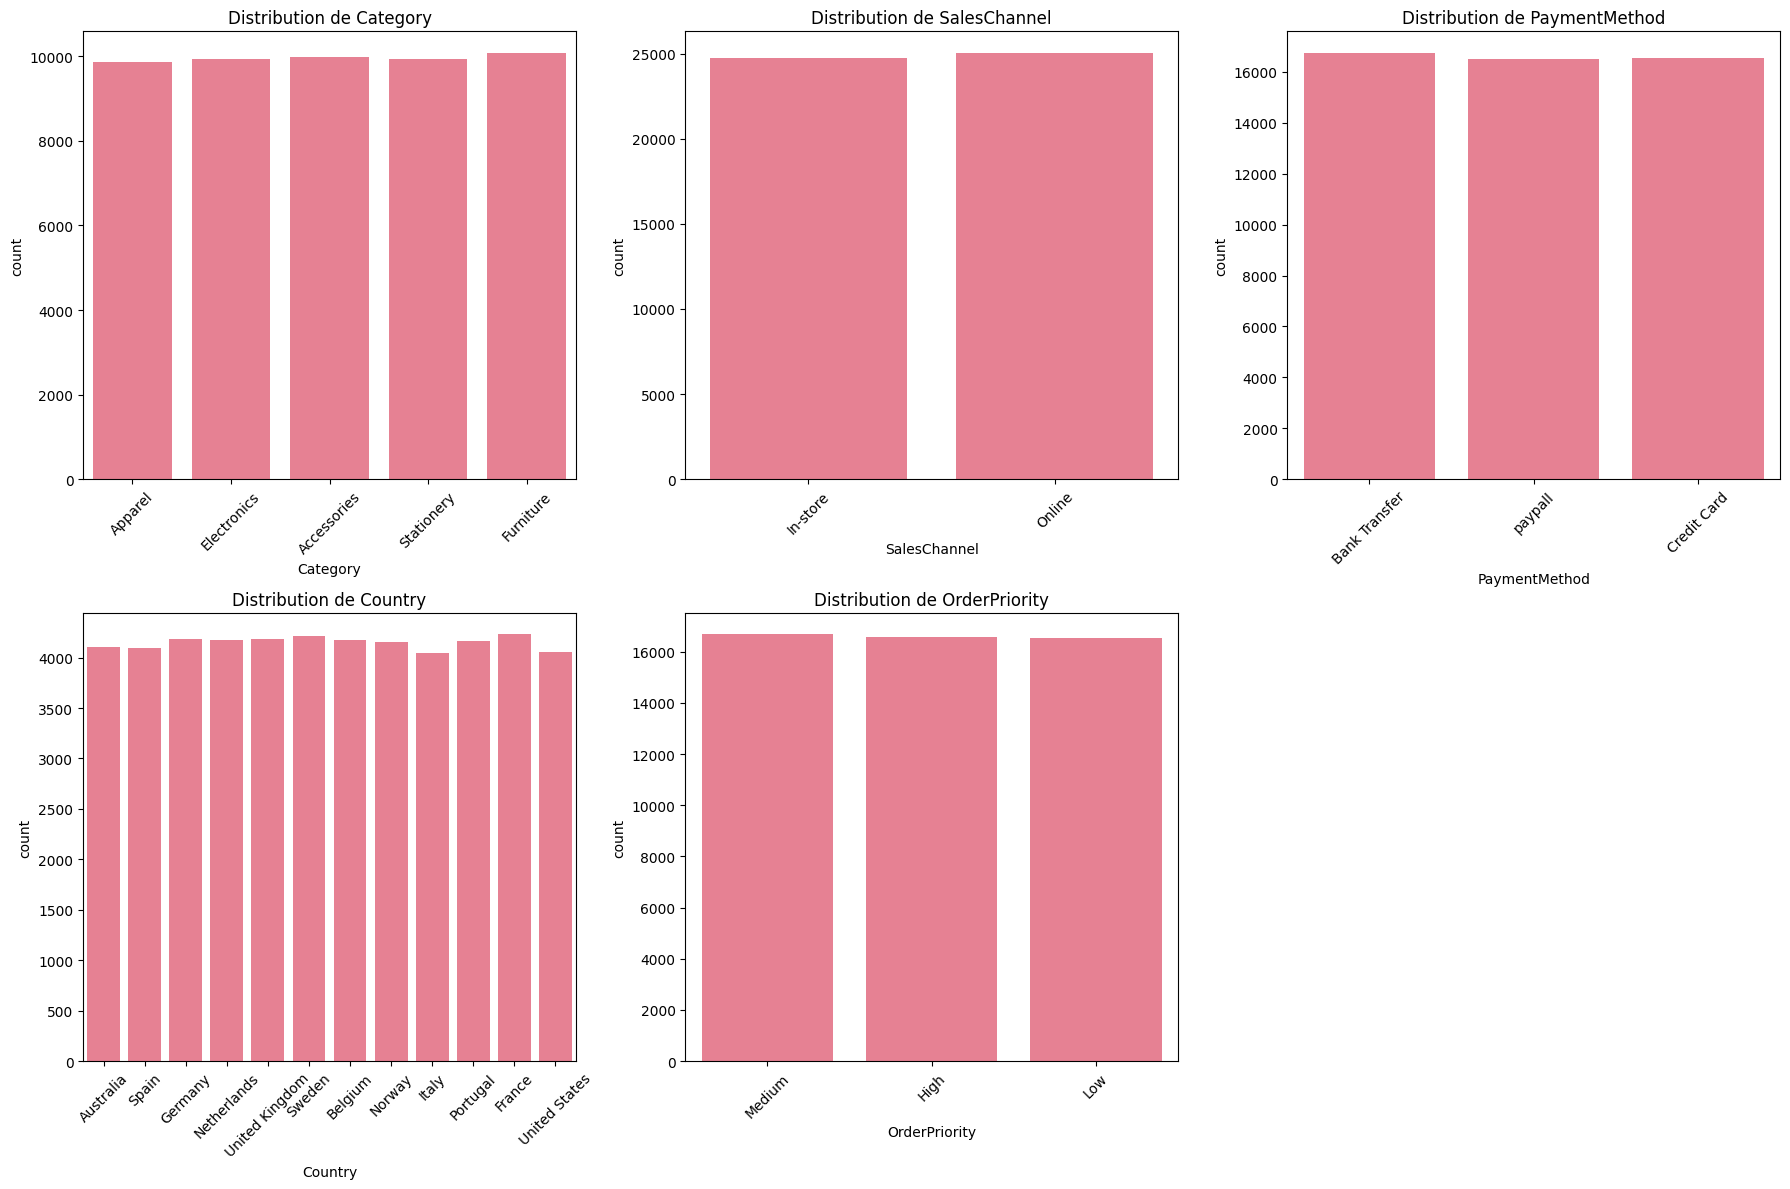

In [7]:
# Variables catégorielles
categorical_cols = ['Category', 'SalesChannel', 'PaymentMethod', 'Country', 'OrderPriority']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}')
        axes[i].tick_params(axis='x', rotation=45)

# Masquer le dernier subplot si vide
if len(categorical_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()